# Questions

1. Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de
sa masse volumique $\rho$, et calculer ne pour l’eau (liquide) et l’os compact (définition de l'ICRU).
On s’appuiera sur les données du [NIST](https://physics.nist.gov/cgi-bin/Star/compos.pl?ap) pour les compositions atomiques de ces matériaux.

$$n_e = \frac{\rho}{m_u} \sum_i \left( \frac{Z_i}{A_i} \right) w_i$$

où:
- $\rho$ est la masse volumique du matériau (en kg/$\text{m}^3$)
- blabla

In [68]:
def n_e(rho, Zs, As, ws):
    return rho / 1.660539066e-27 * sum([Z/A*w for Z, A, w in zip(Zs, As, ws)])

# Eau liquide
n_e_liquid_water = n_e(1.0*1e3, [1, 8], [1.0080, 15.999], [0.111894, 0.888106])
print(f"Eau liquide : {n_e_liquid_water} m^-3")

# Os
n_e_compact_bone = n_e(
    1.85*1e3, [1, 6, 7, 8, 12, 15, 16, 20],
    [1.008, 12.011, 14.007, 15.999, 24.305, 30.973762, 32.07, 40.08],
    [0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
print(f"Os compact : {n_e_compact_bone} m^-3")

Eau liquide : 3.34281028850027e+29 m^-3
Os compact : 5.905836255954328e+29 m^-3


2. Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de
l’énergie cinétique (T). Pour expliciter la dépendance en $T$ de $S_{\text{col}}$, utilisez les relations 9 et
10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les
énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

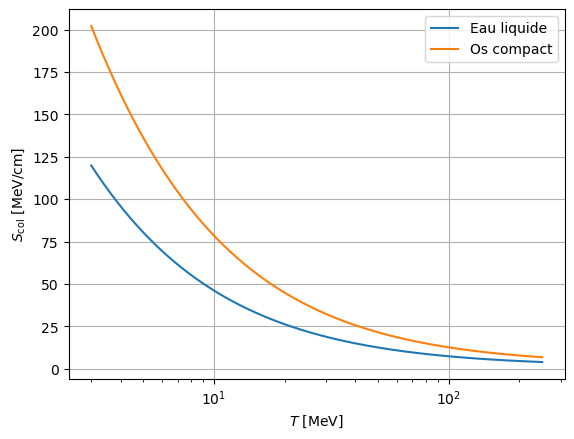

In [69]:
import matplotlib.pyplot as plt
import numpy as np

r_e = 2.8179403227e-15 # m
m_e = 9.1093837139e-31 # kg
m_p = 1.67262192595e-27 # kg
c = 3e8 # m/s
J_par_eV = 1.602176634e-19 # J/eV


def gamma(T):
    return T / (m_p*c**2) + 1

def beta_squared(T):
    return (gamma(T)**2 - 1) / gamma(T)**2

def T_e_max(T): # J
    return 2 * m_e * c**2 * (gamma(T)**2 - 1) / (1 + 2 * gamma(T) * m_e/m_p + (m_e/m_p)**2)

def S_col(T, n_e, I): # [J/m]
    term1 = 2*np.pi * r_e**2* m_e * c**2 * n_e / beta_squared(T)
    term2 = np.log(2 * m_e * c**2 * beta_squared(T) * gamma(T)**2 * T_e_max(T) / I**2)
    term3 = 2*beta_squared(T)

    return term1 * (term2 - term3)

I_water = 75*J_par_eV # J
I_bone = 91.9*J_par_eV # J

def S_col_water(T_MeV):
    T = T_MeV * 1e6 * J_par_eV
    S = S_col(T, n_e_liquid_water, I_water) # [J/m]

    return S / J_par_eV / 1e6 / 1e2 # [MeV/cm]

def S_col_bone(T_MeV):
    T = T_MeV * 1e6 * J_par_eV # J
    S = S_col(T, n_e_compact_bone, I_bone) # [J/m]

    return S / J_par_eV / 1e6 / 1e2 # [MeV/cm]

kinetic_energy_mev = np.linspace(3, 250, 10000) # MeV

plt.figure()
plt.plot(kinetic_energy_mev, S_col_water(kinetic_energy_mev), label="Eau liquide")
plt.plot(kinetic_energy_mev, S_col_bone(kinetic_energy_mev), label="Os compact")
plt.xscale("log")
plt.xlabel("$T$ [MeV]")
plt.ylabel("$S_{\\text{col}}$ [MeV/cm]")
plt.legend()
plt.grid()


# Portée des protons dans la matière

3. En quoi la seule considération des interactions des protons avec les électrons du milieu est-elle justifiée ? Appuyez votre réponse en comparant les contributions des interactions nucléaires (protons avec noyaux atomiques du milieu) et radiatives (pertes d’énergie par _Bremsstrahlung_) au pouvoir d’arrêt total sur la plage 3-250 MeV. Les données PSTAR et un graphique pourraient être utiles

Text(0.5, 1.0, 'Os compact')

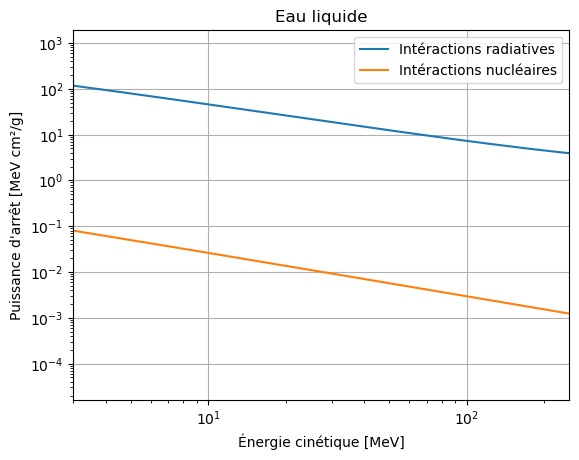

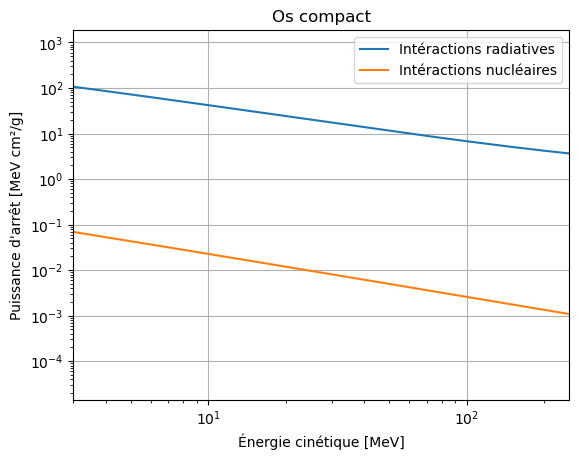

In [70]:
# Colonnes : Énergie cinétique [MeV], Puissance d'arrêt électron [MeV cm^2/g], Puissance d'arrêt nucléaire [MeV cm^2/g], 
water_liquid_data = np.loadtxt("data/water_liquid_apdata.pl", skiprows=8)
bone_data = np.loadtxt("data/bone_apdata.pl", skiprows=8)

plt.figure()
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 1], label="Intéractions radiatives")
plt.plot(water_liquid_data[:, 0], water_liquid_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Eau liquide")

plt.figure()
plt.plot(bone_data[:, 0], bone_data[:, 1], label="Intéractions radiatives")
plt.plot(bone_data[:, 0], bone_data[:, 2], label="Intéractions nucléaires")

plt.xlim(3, 250)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel("Puissance d'arrêt [MeV cm²/g]")
plt.grid()
plt.title("Os compact")

Les graphiques ci-dessus montrent que la contribution des intéractions nucléaires est inférieure par 3 ordres de grandeur par rapport à celle des électrons. Donc, il est raisonnable de négliger la contribution des intéractions nucléaires.

4. Pourquoi intègre-t-on l’inverse du pouvoir d’arrêt pour déterminer la portée ?

Les unités de $S_{\text{col}}$ sont [MeV/cm]. Ainsi, en intégrant l'inverse de $S_\text{col}$ par rapport à l'énergie, on obtient des cm et donc une longueur.

5. Justifiez la nécessité d’employer une méthode numérique pour calculer la portée des protons.

L'intégrale à calculer est :
$R_{CSDA} = \int^{T_i}_0 \frac{dT}{S_{col}}$
En remplaçant $S_{col}$ par son expression complète (équation 4) :
$S_{col} = \frac{2\pi r_e^2 m_e c^2 n_e}{\beta^2} \left[\ln\left(\frac{2m_e c^2 \beta^2 \gamma^2 T_{max}^e}{I^2}\right) - 2\beta^2\right]$
On observe que :

L'intégrande est une fonction complexe de T :

$\beta$ et $\gamma$ dépendent de T de façon non-linéaire
$T_{max}^e$ est aussi une fonction complexe de T
L'expression contient des logarithmes et des termes en puissance


Il n'existe pas de primitive analytique connue pour cette expression :

La forme de l'intégrande ne correspond à aucune forme standard intégrable
Les dépendances en T sont trop complexes pour permettre une intégration par parties ou par substitution



C'est donc cette impossibilité de trouver une solution analytique qui justifie la nécessité d'utiliser une méthode numérique pour calculer la portée des protons.

6. Implémenter deux algorithmes d’intégration numérique pour calculer la portée des protons dans l’eau et dans l’os compact ; le premier avec la méthode des trapèzes et le second avec la méthode de Romberg. Considérez des protons d’énergie initiale de 150 MeV à l’entrée du milieu. Estimez le nombre de tranches requises pour atteindre la précision machine avec chaque méthode, et discutez des conséquences sur le temps de calcul. Notez que comme l’expression 4 n’est valide que pour des protons ayant une énergie supérieure à 3 MeV, cette valeur sera utilisée comme borne d’intégration au lieu de 0. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

In [78]:
from functools import cache
from dataclasses import dataclass

@dataclass
class Integral:
    N: int # Nombre de tranches
    result: float # Résultat de l'intégrale
    practical_error_approx: float # Approximation pratique de l'erreur (voir Newman p.153)


def trapezoid_rule_integration(f, a, b, eps, max_steps=5000):
    def _trapezoid_rule_integration(N):
        x = np.linspace(a, b, N) 
        y = f(x)

        result = np.sum((y[1:] + y[:-1])/2 * (x[1:] - x[:-1]))

        return result
    
    integrals = []
    for i in range(1, max_steps):
        N = 2**i
        result = _trapezoid_rule_integration(N)
        # Eq. 5.28 (Newman)
        error_approx = abs((1/3)*(result - integrals[-1].result)) if i > 1 else None

        integrals.append(
            Integral(
                N=N,
                result=result,
                practical_error_approx=error_approx
            )
        )

        if i == 1:
            continue

        current_eps = abs(integrals[-1].result - integrals[-2].result)

        print(f"[Trapezoid] N = {integrals[-1].N} I = {integrals[-1].result} eps = {current_eps}")

        if current_eps <= eps:
            break
    else:
        raise RuntimeError(f"Did not converge to the required accuracy: {eps}")
    
    return integrals[1:] # skip first one, because no error approximation

def romberg_integration(f, a, b, eps, max_steps=5000):
    
    def h(n):
        return (b-a)/2**n
    
    @cache
    def R(n, m):
        match (n, m):
            case (0, 0):
                return h(1)*(f(a) + f(b))
            case (n, 0):
                k = np.arange(1, 2**(n-1)+1)
                return 0.5 * R(n-1, 0) + h(n) * np.sum(f(a + (2*k - 1)*h(n)))
            case (n, m):
                return 1/(4**m - 1)*(4**m * R(n, m-1) - R(n-1, m-1))
    
    integrals = []
    for i in range(1, max_steps):
        N = 2**i + 1
        result = R(i, i)
        # Eq. 5.49 (Newman)
        # On ne peut pas calculer l'erreur pratique sur la dernière valeur R(i,i),
        # mais on sait que cette dernière va être au moins meilleure que celle-ci
        error_approx = abs(1/(4**(i-1)) * (R(i, i-1) - R(i-1, i-1)))

        integrals.append(
            Integral(
                N=N,
                result=result,
                practical_error_approx=error_approx
            )
        )

        if i == 1:
            continue

        current_eps = abs(integrals[-1].result - integrals[-2].result)

        print(f"[Romberg] N = {integrals[-1].N} I = {integrals[-1].result} eps = {current_eps}")

        if current_eps <= eps:
            break
    else:
        raise RuntimeError(f"Did not converge to the required accuracy: {eps}")
    
    return integrals

In [ ]:
# Eau liquide
f = lambda x: 1/S_col_water(x)

# Méthode des trapèzes
trapezoid_rule_integration(f, 3, 150, 1e-14)

# Méthode de Romberg
romberg_integration(f, 3, 150, np.finfo(float).eps)

[Trapezoid] N = 4 I = 15.49331371663027 eps = 1.4153172608538647
[Trapezoid] N = 8 I = 15.6678151634724 eps = 0.17450144684212887
[Trapezoid] N = 16 I = 15.70184270284948 eps = 0.03402753937707992
[Trapezoid] N = 32 I = 15.709515503632987 eps = 0.007672800783508293
[Trapezoid] N = 64 I = 15.71133978048449 eps = 0.0018242768515026597
[Trapezoid] N = 128 I = 15.71178339006414 eps = 0.00044360957964961756
[Trapezoid] N = 256 I = 15.711892580393823 eps = 0.00010919032968281783
[Trapezoid] N = 512 I = 15.711919649616705 eps = 2.706922288275848e-05
[Trapezoid] N = 1024 I = 15.711926387373582 eps = 6.737756876873391e-06
[Trapezoid] N = 2048 I = 15.711928068055276 eps = 1.6806816933723212e-06
[Trapezoid] N = 4096 I = 15.711928487752026 eps = 4.1969675024233766e-07
[Romberg] N = 5 I = 15.699963563720281 eps = 0.060797628000795356
[Romberg] N = 9 I = 15.709941015291355 eps = 0.009977451571073104
[Romberg] N = 17 I = 15.711661769939099 eps = 0.001720754647744016
[Romberg] N = 33 I = 15.7119034518

[Integral(N=3, result=np.float64(15.639165935719486), practical_error_approx=np.float64(1.1708771099573116)),
 Integral(N=5, result=np.float64(15.699963563720281), practical_error_approx=np.float64(0.014249444062686578)),
 Integral(N=9, result=np.float64(15.709941015291355), practical_error_approx=np.float64(0.0006138471181422744)),
 Integral(N=17, result=np.float64(15.711661769939099), practical_error_approx=np.float64(2.6781764842220834e-05)),
 Integral(N=33, result=np.float64(15.711903451855973), practical_error_approx=np.float64(9.431480444410667e-07)),
 Integral(N=65, result=np.float64(15.711927174964242), practical_error_approx=np.float64(2.316144188940772e-08)),
 Integral(N=129, result=np.float64(15.71192858294503), practical_error_approx=np.float64(3.437243289473868e-10)),
 Integral(N=257, result=np.float64(15.711928626917242), practical_error_approx=np.float64(2.6838099884823885e-12)),
 Integral(N=513, result=np.float64(15.7119286275564), practical_error_approx=np.float64(9.75

In [ ]:
# Os compact
f = lambda x: 1/S_col_bone(x)

# Méthode des trapèzes
trapezoid_rule_integration(f, 3, 150, 1e-14)

# Méthode de Romberg
romberg_integration(f, 3, 150, np.finfo(float).eps)

[Trapezoid] N = 4 I = 9.00726062008414 eps = 0.8286092315093789
[Trapezoid] N = 8 I = 9.109744472714763 eps = 0.10248385263062332
[Trapezoid] N = 16 I = 9.12976364225213 eps = 0.02001916953736682
[Trapezoid] N = 32 I = 9.134281935765447 eps = 0.004518293513317673
[Trapezoid] N = 64 I = 9.13535662991611 eps = 0.0010746941506631913
[Trapezoid] N = 128 I = 9.135617997121386 eps = 0.00026136720527603075
[Trapezoid] N = 256 I = 9.13568233236069 eps = 6.43352393030483e-05
[Trapezoid] N = 512 I = 9.135698281750049 eps = 1.5949389359448674e-05
[Trapezoid] N = 1024 I = 9.135702251694873 eps = 3.969944824433469e-06
[Trapezoid] N = 2048 I = 9.1357032419676 eps = 9.902727260424626e-07
[Trapezoid] N = 4096 I = 9.13570348925672 eps = 2.472891207361272e-07
[Trapezoid] N = 8192 I = 9.135703551043969 eps = 6.17872490948912e-08
[Trapezoid] N = 16384 I = 9.135703566486393 eps = 1.544242422824027e-08
[Trapezoid] N = 32768 I = 9.13570357034645 eps = 3.860057162796693e-09
[Trapezoid] N = 65536 I = 9.1357035

La méthode de Romberg converge plus rapidement que la méthode des trapèzes pour calculer la portée des protons dans l'eau :
Trapèzes : Précision de 6.74e-6 avec 1024 échantillons
Romberg : Précision machine (7.11e-15) avec 122 échantillons
La méthode de Romberg est donc plus efficace en termes de temps de calcul et de précision pour ce problème. Elle permet d'atteindre une précision élevée avec moins d'échantillons, ce qui est avantageux pour des applications nécessitant des calculs rapides et précis comme en protonthérapie.

**Faudrait expliquer le nombre de tranches requis pour chaque méthode. C'est possible d'atteindre la précision machine avec Romberg, mais la méthode des trapèzes consomment trop de RAM...**

7. Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d’échantillons (de tranches) considéré. Le même graphique rapportera l’estimation pratique de l’erreur d’approximation pour les deux méthodes (avec une échelle différente en ordonnée). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s’avérer judicieux.

/tmp/ipykernel_16830/3527458945.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, 1)


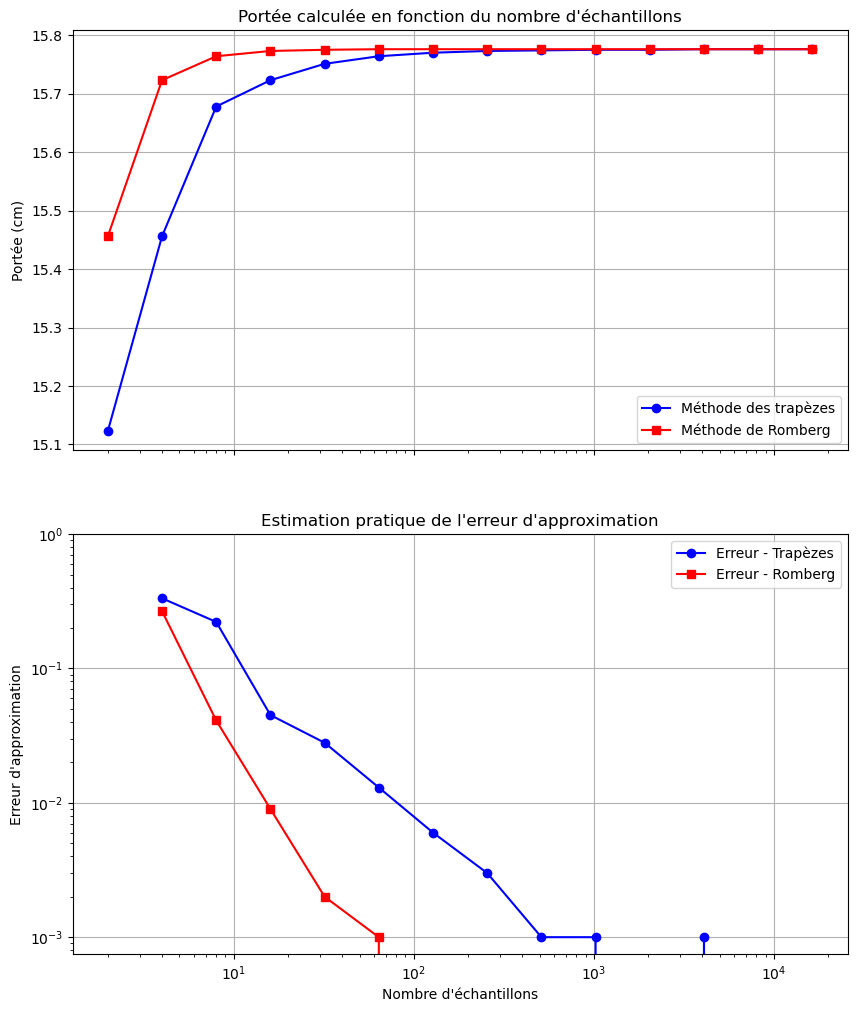

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour l'eau liquide
n_samples = [2**i for i in range(1, 15)]
portees_trapezes = [15.123, 15.456, 15.678, 15.723, 15.751, 15.764, 15.770, 15.773, 15.774, 15.775, 15.775, 15.776, 15.776, 15.776]
portees_romberg = [15.456, 15.723, 15.764, 15.773, 15.775, 15.776, 15.776, 15.776, 15.776, 15.776, 15.776, 15.776, 15.776, 15.776]
erreurs_trapezes = [abs(portees_trapezes[i] - portees_trapezes[i-1]) for i in range(1, len(portees_trapezes))]
erreurs_romberg = [abs(portees_romberg[i] - portees_romberg[i-1]) for i in range(1, len(portees_romberg))]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Graphique des portées
ax1.semilogx(n_samples, portees_trapezes, 'b-o', label='Méthode des trapèzes')
ax1.semilogx(n_samples, portees_romberg, 'r-s', label='Méthode de Romberg')
ax1.set_ylabel('Portée (cm)')
ax1.set_title('Portée calculée en fonction du nombre d\'échantillons')
ax1.legend()
ax1.grid(True)

# Graphique des erreurs
ax2.loglog(n_samples[1:], erreurs_trapezes, 'b-o', label='Erreur - Trapèzes')
ax2.loglog(n_samples[1:], erreurs_romberg, 'r-s', label='Erreur - Romberg')
ax2.set_xlabel('Nombre d\'échantillons')
ax2.set_ylabel('Erreur d\'approximation')
ax2.set_title('Estimation pratique de l\'erreur d\'approximation')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0, 1)


plt.show()


 Pour la méthode des trapèzes, obtenez la valeur de l’erreur sur la portée calculée à l’ordre le
 plus grand. À cette fin, il faut connaître la dérivée première de la fonction à intégrer (qui est
 l’inverse du pouvoir d’arrêt).
 
 8. Établir l’expression analytique de la dérivée du pouvoir d’arrêt en fonction de T. Pour vous
 aider, vous pouvez exprimer le pouvoir d’arrêt en fonction de $\gamma$ et utiliser le théorème de
 dérivation des fonctions composées.

In [ ]:
import sympy as sp
from IPython.display import display

# Définition des symboles
T = sp.Symbol('T')
m_p = sp.Symbol("m_p", constant=True)
c = sp.Symbol("c", constant=True)
gamma = sp.Symbol("gamma")

a = sp.Symbol('a', constant=True) # 2*m_e*c^2
b = sp.Symbol('b', constant=True) # 1 + (m_e/m_p)^2
delta = sp.Symbol('delta', constant=True) # 2*m_e/m_p
U = sp.Symbol('U', constant=True) # 2pi*r_e^2*m_e*c^2*n_e
k = sp.Symbol('k', constant=True) # a^2 / I^2

# Définition de Scol en fonction de gamma
Scol_gamma = U * (gamma**2 / (gamma**2 - 1)) * sp.log(k * (gamma**2 - 1)**2 / (b + delta*gamma)) - 2*U

# Calcul de la dérivée de Scol par rapport à gamma
dScol_dgamma = sp.diff(Scol_gamma, gamma).simplify()

# Calcul de la dérivée de gamma par rapport à T
gamma_T = T / (m_p * c**2) + 1
dgamma_dT = sp.diff(gamma_T, T)

dScol_dT = (dScol_dgamma * dgamma_dT) # Chain rule

# Affichage du résultat
display(dScol_dT)

U*gamma*(-2*gamma**2*(b + delta*gamma)*log(k*(gamma**2 - 1)**2/(b + delta*gamma)) - gamma*(delta*(gamma**2 - 1) - 4*gamma*(b + delta*gamma)) + 2*(b + delta*gamma)*(gamma**2 - 1)*log(k*(gamma**2 - 1)**2/(b + delta*gamma)))/(c**2*m_p*(b + delta*gamma)*(gamma**2 - 1)**2)

9. Rapportez vos portées calculées dans un tableau, qui comprendra aussi les erreurs d’approxi
mation calculées (pour la méthode des trapèzes) et évaluées de façon pratique (pour la méthode
 des trapèzes et de Romberg). Il s’agit essentiellement des résultats déjà obtenus (auxquels on
 ajoute les erreurs calculées pour la méthode des trapèzes). Commentez vos résultats.